# Lending Club Case Study

## Pre-requisite: Import Libraries and set working directory

In [2]:
# Import Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from scipy import stats
import re
import seaborn as sns
import io

In [ ]:
# Up to 2 Decimal Places for Float
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Set display.max_columns to 500 to see all columns
pd.set_option('display.max_columns', 500)

In [3]:
from google.colab import files
uploaded = files.upload()

pd.read_csv(io.BytesIO(uploaded['lending_club_loans.csv']))


Saving lending_club_loans.csv to lending_club_loans.csv


<ipython-input-3-fae7423331ff>:4: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(io.BytesIO(uploaded['lending_club_loans.csv']))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='sourcing'></a>

## Step 1. Data Sourcing

In [6]:
loan = pd.read_csv('lending_club_loans.csv',dtype='object')
print("Number of Rows and Columns are: ", loan.shape)

Number of Rows and Columns are:  (42542, 115)


In [ ]:
# See the Sample data to understand contents in each columns
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,Sep-16,744,740,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,740,744,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-16,499,0,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,735,739,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,Sep-16,719,715,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,690,694,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,604,600,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Number of records with No Null value
loan.info(verbose=True, null_counts=True)

<ipython-input-14-1f287b9a8088>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 115 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              42538 non-null  object
 1    member_id                       42535 non-null  object
 2    loan_amnt                       42535 non-null  object
 3    funded_amnt                     42535 non-null  object
 4    funded_amnt_inv                 42535 non-null  object
 5    term                            42535 non-null  object
 6    int_rate                        42535 non-null  object
 7    installment                     42535 non-null  object
 8    grade                           42535 non-null  object
 9    sub_grade                       42535 non-null  object
 10   emp_title                       39909 non-null  object
 11   emp_length                      41423 non-null  object
 12   home_ownership                

Number of columns with more than 30% Null values: 58


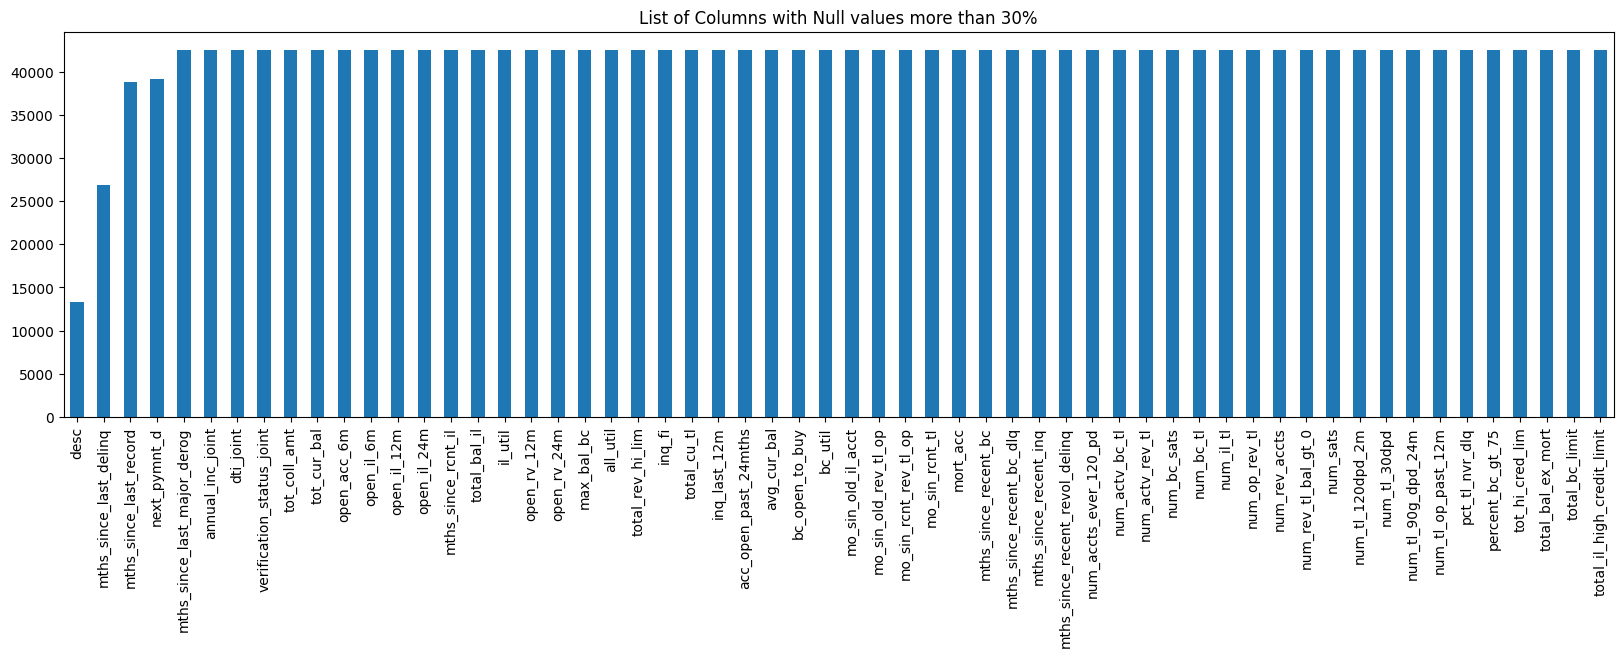

In [ ]:
# Columns with NA more than 30%
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
print("Number of columns with more than 30% Null values: " + str(NA_col.count()))
plt.figure(figsize=(20,5))
NA_col.plot(kind='bar')
plt.title('List of Columns with Null values more than 30%')
plt.show()

<font color='#0dab7f'><b>Intution</b>: <b>54</b> Columns has all null values and <b>4</b> Columns has more than 30% null values. We will remove columns with more than 30% if null values</font>

## Step 2. Data Cleaning

In [7]:
#UDF Name            : removeNull
#Input parameters    : a. dataframe - Dataframe to operate on
#                      b. axis - 0 for row and 1 for column
#                      c. percent - percent of data where column/rows value are null
#Output parameter    : dataframe - dataframe with columns/rows deleted having more than x% of Null values

def removeNull(dataframe, axis = 1, percent = 0.3):
    df = dataframe.copy()
    print("Input dataframe rows,columns",df.shape)
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)
    print("Number of Columns dropped: ",len(colnames))

    print("Output dataframe rows,columns",df.shape)

    return df

In [8]:
# Remove columns with more than 30% Null
loan = removeNull(loan, axis = 1 ,percent = 0.3)

Input dataframe rows,columns (42542, 115)
Number of Columns dropped:  58
Output dataframe rows,columns (42542, 57)


In [10]:
# Check for each column on how many different values it can have
# Used to find if categorical variables (less than 9) else continous variables.
loan.nunique()

id                            42538
member_id                     42535
loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9240
term                              2
int_rate                        394
installment                   16459
grade                             7
sub_grade                        35
emp_title                     30658
emp_length                       11
home_ownership                    5
annual_inc                     5597
verification_status               3
issue_d                          55
loan_status                       9
pymnt_plan                        2
url                           42535
purpose                          14
title                         21256
zip_code                        837
addr_state                       50
dti                            2894
delinq_2yrs                      12
earliest_cr_line                530
fico_range_low                   44
fico_range_high             

In [11]:
# Remove columns where number of unique value is only 1. Since it will not affect analysis
unique = loan.nunique()
unique = unique[unique.values == 1]
print("Old dataset rows,columns",loan.shape )
loan.drop(labels = list(unique.index), axis = 1, inplace = True)
print("New dataset rows,columns",loan.shape )

Old dataset rows,columns (42542, 57)
New dataset rows,columns (42542, 52)


In [12]:
# Percentage of rows having null value for each of columns
print(((loan.isna().sum()/len(loan.index))*100).round())

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
fico_range_low             0.0
fico_range_high            0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_ut

In [13]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
# Replace emp_length having "nan" with "0"
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
print(loan.emp_length.unique())

# Set the order for experience
emp_length_order = ["0", "< 1 year", "1 year", "2 years", "3 years",  "4 years", "5 years", "6 years", "7 years","8 years", "9 years",  "10+ years"]
loan['emp_length'] = pd.Categorical(loan['emp_length'],categories=emp_length_order, ordered=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']
['10+ years', '< 1 year', '1 year', '3 years', '8 years', ..., '5 years', '6 years', '2 years', '7 years', '0']
Length: 12
Categories (12, object): ['0' < '< 1 year' < '1 year' < '2 years' ... '7 years' < '8 years' <
                          '9 years' < '10+ years']


In [15]:
# Business Driven - Drop columns not required for Analysis
loan.nunique()

id                         42538
member_id                  42535
loan_amnt                    898
funded_amnt                 1051
funded_amnt_inv             9240
term                           2
int_rate                     394
installment                16459
grade                          7
sub_grade                     35
emp_title                  30658
emp_length                    12
home_ownership                 5
annual_inc                  5597
verification_status            3
issue_d                       55
loan_status                    9
pymnt_plan                     2
url                        42535
purpose                       14
title                      21256
zip_code                     837
addr_state                    50
dti                         2894
delinq_2yrs                   12
earliest_cr_line             530
fico_range_low                44
fico_range_high               44
inq_last_6mths                28
open_acc                      44
pub_rec   

In [16]:
print("Before drop rows and columns: ",loan.shape)
not_required_columns = ["id","member_id","url","zip_code"]
loan.drop(labels = not_required_columns, axis = 1, inplace = True)
print("Afore drop rows and columns: ",loan.shape)

Before drop rows and columns:  (42542, 52)
Afore drop rows and columns:  (42542, 48)


In [17]:
# Type cast all continous/numeric variables to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [18]:
# Remove % sign from interest rate
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')

In [19]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,Jan-15,171.62,Sep-16,744,740,0,0,0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1.11,Apr-13,119.66,Sep-16,499,0,0,0,0,0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,Jun-14,649.91,Sep-16,719,715,0,0,0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,Jan-15,357.48,Apr-16,604,600,0,0,0,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0,Sep-16,67.79,Sep-16,694,690,0,0,0,0


In [20]:
# Check different categories for purpose
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.485826
credit_card           12.874336
other                 10.401486
home_improvement       7.519628
major_purchase         5.432279
small_business         4.682431
car                    3.796248
wedding                2.360021
medical                1.770016
moving                 1.478539
house                  1.001363
educational            0.991961
vacation               0.940247
renewable_energy       0.249166
Name: purpose, dtype: float64

In [21]:
# Drop loan with purpose as "other" or less than 0.75%
print("Before drop rows and columns: ",loan.shape)
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("After drop rows and columns: ",loan.shape)

print(loan.purpose.unique())

Before drop rows and columns:  (42542, 48)
After drop rows and columns:  (38011, 48)
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational' nan]


In [22]:
# Check different categories for loan_status
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid                                             79.450685
Charged Off                                            13.151456
Does not meet the credit policy. Status:Fully Paid      4.427666
Does not meet the credit policy. Status:Charged Off     1.681092
Current                                                 1.189129
In Grace Period                                         0.039462
Late (31-120 days)                                      0.028939
Late (16-30 days)                                       0.010523
Default                                                 0.002631
Name: loan_status, dtype: float64

## Step 3:  Derived Metrics
1. Type Driven
2. Business Driven
3. Data Driven

In [23]:
# Business Driven -  Loan amount to Annual Income ratio
loan['loan_income_ratio']= loan['loan_amnt'] / loan['annual_inc']

In [24]:
# Type Driven - Extract Year & Month from Issue date
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].head()

<ipython-input-24-0b4dd87084e6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
<ipython-input-24-0b4dd87084e6>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str


,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [25]:
# Type Driven
# Set the order - months from Jan to Dec
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

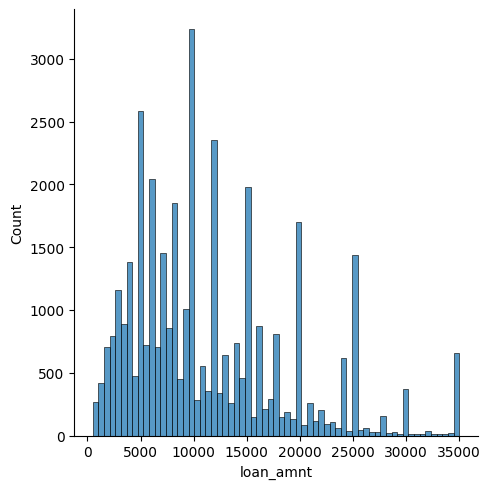

In [26]:
# To decide on Bin Range in next step
sns.displot(loan['loan_amnt'])
plt.show()

In [27]:
# Type Driven - Create Bins (Categorical Vriable) for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)
loan['loan_amnt_range']

0            0-5000
1            0-5000
2            0-5000
5            0-5000
6        5000-10000
            ...    
42516        0-5000
42538           NaN
42539           NaN
42540           NaN
42541           NaN
Name: loan_amnt_range, Length: 38011, dtype: category
Categories (6, object): ['0-5000' < '5000-10000' < '10000-15000' < '15000-20000' < '20000-25000' <
                         '25000 and above']

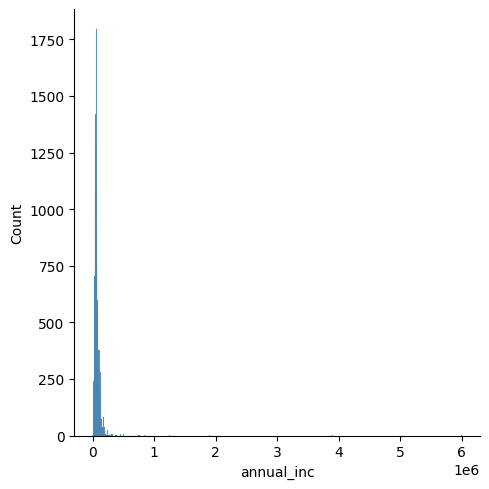

In [28]:
# To decide on Bin Range in next step
sns.displot(loan['annual_inc'])
plt.show()

# Note: 1e6 Shows high distribution of salary

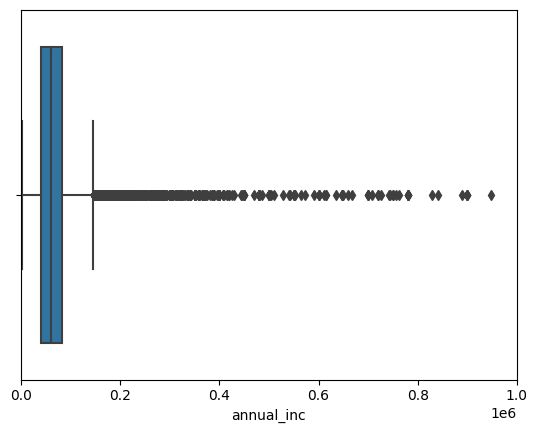

In [29]:
# To decide on Bin Range in next step
sns.boxplot(data =loan, x='annual_inc')
plt.xlim(-100, 1000000)
plt.show()

In [30]:
# Type Driven - Create Bins (Categorical Vriable) for range of Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)
loan[['annual_inc_range', 'annual_inc']]

,annual_inc_range,annual_inc
0,0-25000,24000.0
1,25000-50000,30000.0
2,0-25000,12252.0
5,25000-50000,36000.0
6,25000-50000,47004.0
...,...,...
42516,25000-50000,30000.0
42538,NaN,NaN
42539,NaN,NaN
42540,NaN,NaN


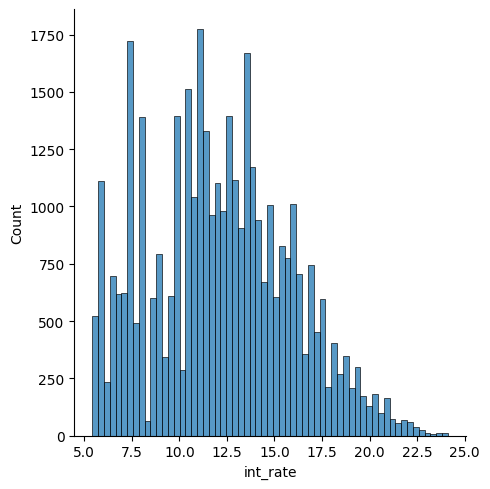

In [31]:
# To decide on Bin Range in next step
sns.displot(loan['int_rate'])
plt.show()

In [32]:
# Type Driven - Create Bins (Categorical Vriable) for range of Interest rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

<a id='univariate'></a>

## Step 4: Univariate Analysis

In [34]:
#UDF Name            : univariateAnalysis
#Input parameters    : a. dataframe - Dataframe to operate on
#                      b. col - Column for which Univariate analysis is required to be done
#                      c. variable - 0 for Continous and 1 for Categorical
#                      d. hue - plot against what for categorical variable
#Output parameter    : Nil
# Description        : For variable = 0, continous variable, plot - Distribution Plot, Violin Plot and Box Plot
#                      For variable = 1, Categorical variable, plot - Count Plot

def univariateAnalysis(df, col, vartype, hue = None):
    sns.set(style="darkgrid")

    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.histplot(df[col],ax=ax[0], kde=True)
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2])

    if vartype == 1:
        temp = pd.Series(data = hue,dtype=pd.StringDtype())
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        plt.xticks(rotation=90)
        plt.legend(loc='upper right')
        del temp
    else:
        exit

    plt.show()

### Step 4.1: Continuous Variables

In [36]:
loan.describe(percentiles=[0.05,0.1,0.25,0.30,0.50,0.60,0.75,0.80,0.90,0.95,0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
count,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,3.800400e+04,38004.000000,38004.000000
mean,11463.400563,11183.976029,10497.002978,12.187641,333.033732,6.970020e+04,13.494909,0.190560
std,7439.996674,7173.505999,7171.242326,3.724417,209.683684,6.485489e+04,6.688202,0.116201
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000789
5%,2500.000000,2500.000000,1749.999753,6.390000,77.763000,2.400000e+04,2.260000,0.044444
10%,3500.000000,3500.000000,2850.000000,7.185000,105.560000,3.000000e+04,4.260000,0.061241
25%,6000.000000,5775.000000,5000.000000,9.630000,173.240000,4.114320e+04,8.380000,0.100787
30%,6300.000000,6125.000000,5916.193787,10.250000,194.650000,4.500000e+04,9.490000,0.114286
50%,10000.000000,10000.000000,9000.000000,11.990000,291.375000,6.000000e+04,13.570000,0.166667
60%,12000.000000,12000.000000,10600.000000,13.110000,338.930000,6.660000e+04,15.550000,0.200000


#### 4.1.1: Loan Amount

In [37]:
loan.loan_amnt.describe()

count    38004.000000
mean     11463.400563
std       7439.996674
min        500.000000
25%       6000.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

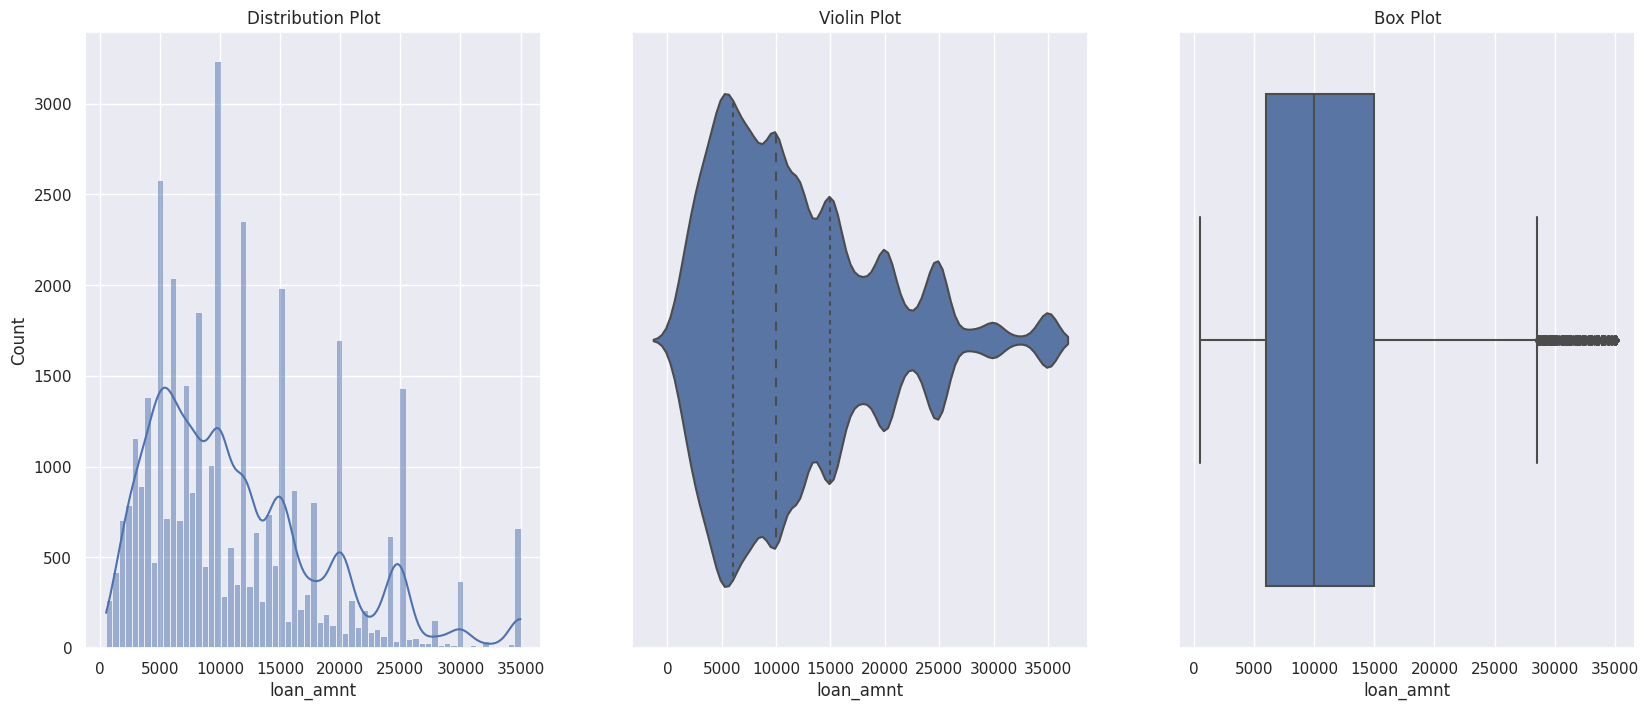

In [38]:
univariateAnalysis(loan,'loan_amnt',0)

<font color='#0dab7f'><b>Intution</b>: Most Loan amounts are between <b>6000 to 15000 USD.</b></font>

#### 4.1.2. Interest Rate

In [39]:
loan.int_rate.describe()

count    38004.000000
mean        12.187641
std          3.724417
min          5.420000
25%          9.630000
50%         11.990000
75%         14.790000
max         24.110000
Name: int_rate, dtype: float64

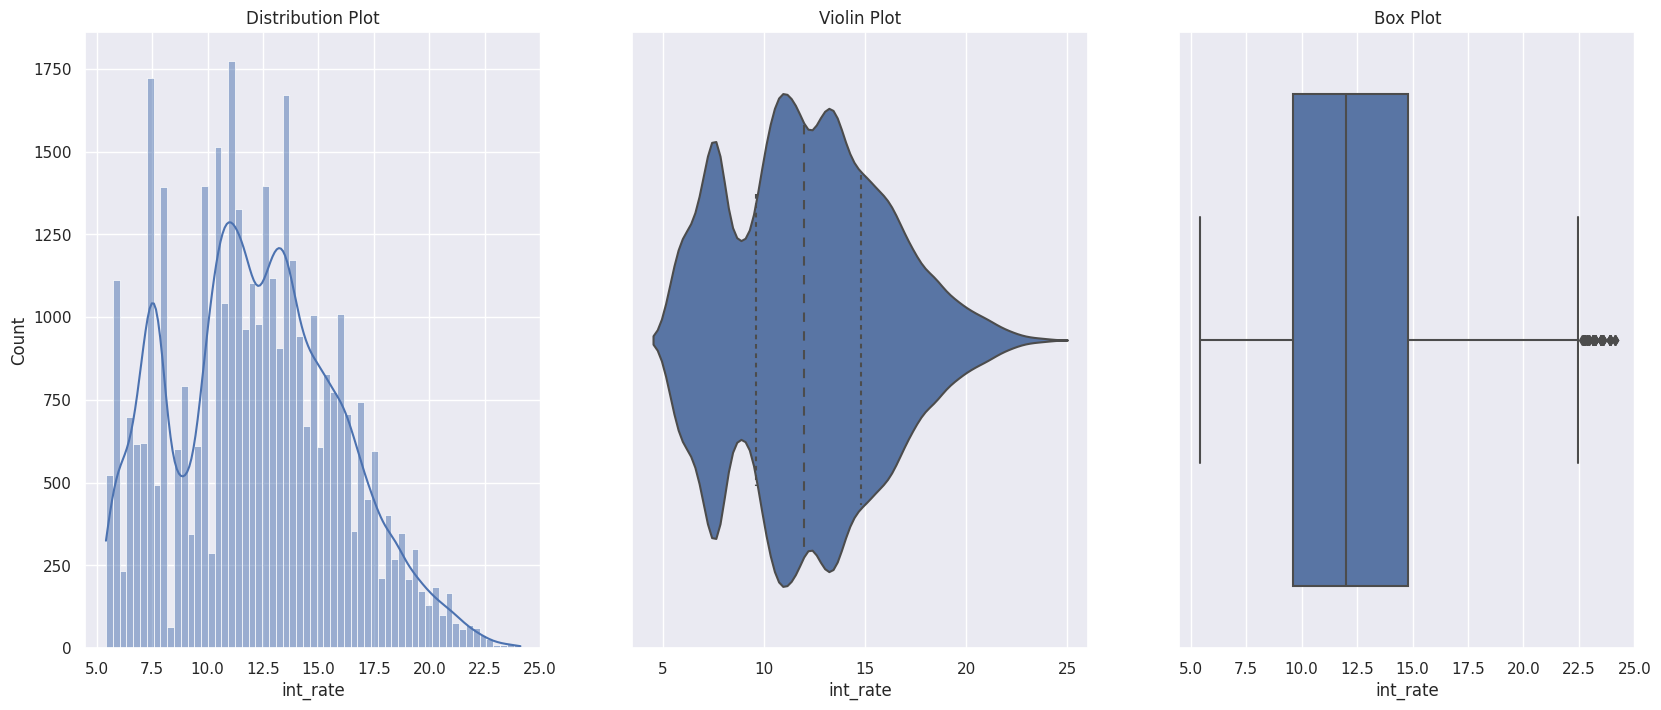

In [40]:
univariateAnalysis(loan,'int_rate',0)

<font color='#0dab7f'><b>Intution</b>: Most of Loan Interest rates are between <b>9.25% and 14.61%.</b></font>

#### 4.1.3. Annual Income

In [41]:
loan["annual_inc"].describe()

count    3.800400e+04
mean     6.970020e+04
std      6.485489e+04
min      1.896000e+03
25%      4.114320e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [42]:
# Since we see outlier, we need to remove it. Lets see which percentile to remove
loan["annual_inc"].describe(percentiles=[0.05,0.1,0.25,0.30,0.50,0.60,0.75,0.80,0.90,0.95,0.99])

count    3.800400e+04
mean     6.970020e+04
std      6.485489e+04
min      1.896000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.114320e+04
30%      4.500000e+04
50%      6.000000e+04
60%      6.660000e+04
75%      8.320000e+04
80%      9.000000e+04
90%      1.180000e+05
95%      1.449366e+05
99%      2.418408e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [43]:
# Outlier is after 99 percentile. 6,000,000 which is approx 86 times more than mean value
# Remove from 99 percentile onwards
q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] <= q]
loan["annual_inc"].describe()

count     37623.000000
mean      66175.286801
std       35674.136531
min        1896.000000
25%       41000.000000
50%       59484.000000
75%       82000.000000
max      240734.000000
Name: annual_inc, dtype: float64

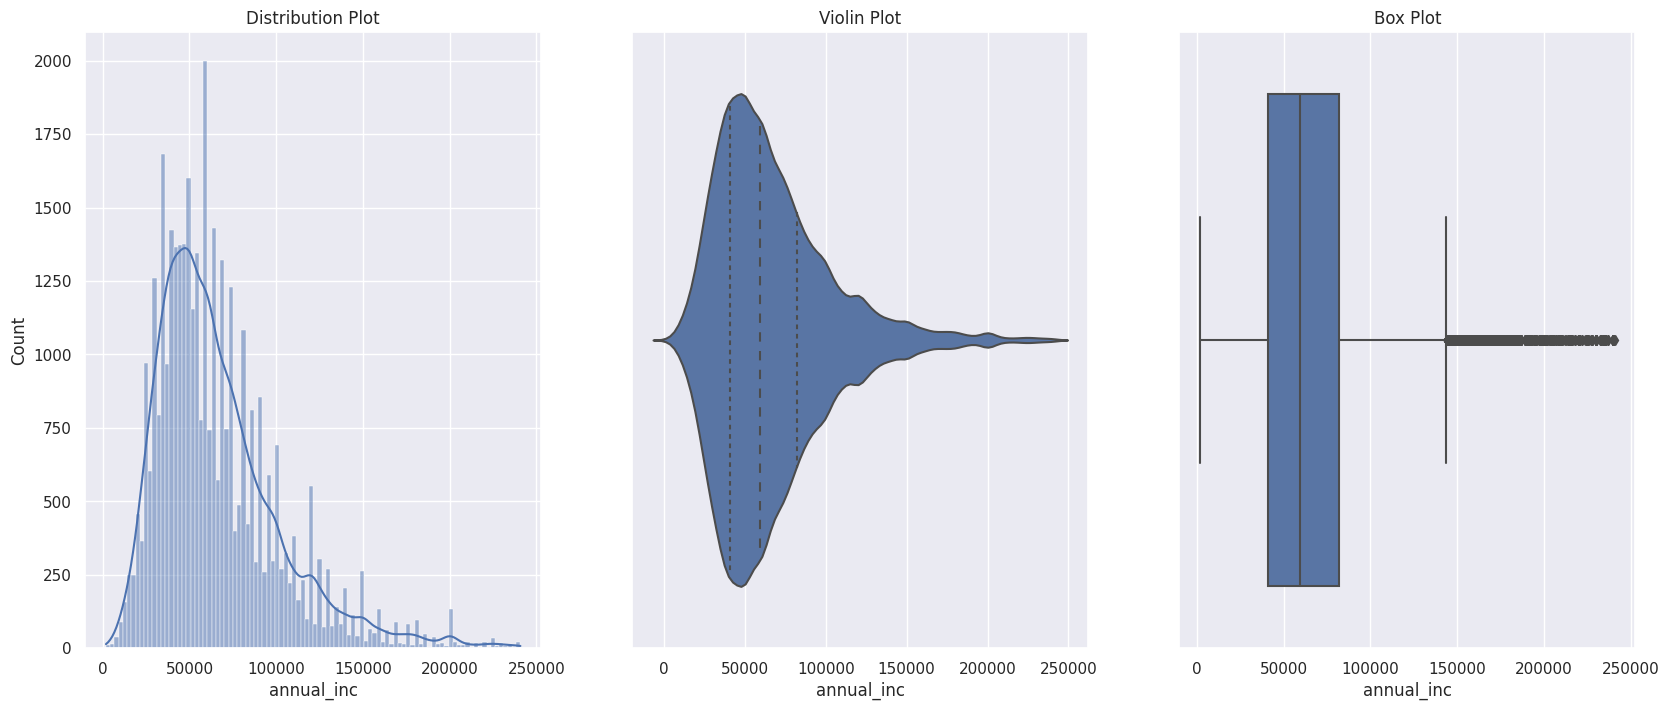

In [44]:
univariateAnalysis(df=loan,col='annual_inc',vartype=0)

<font color='#0dab7f'><b>Intution</b>: Most of Applicants earn between <b>41000 to 82000 USD annually.</b></font>

### Step 4.2: Categorical Variables

#### 4.2.1 Loan Status

loan_status
Charged Off                                            0.131994
Current                                                0.011908
Default                                                0.000027
Does not meet the credit policy. Status:Charged Off    0.016586
Does not meet the credit policy. Status:Fully Paid     0.043856
Fully Paid                                             0.794833
In Grace Period                                        0.000399
Late (16-30 days)                                      0.000106
Late (31-120 days)                                     0.000292
Name: loan_amnt, dtype: float64

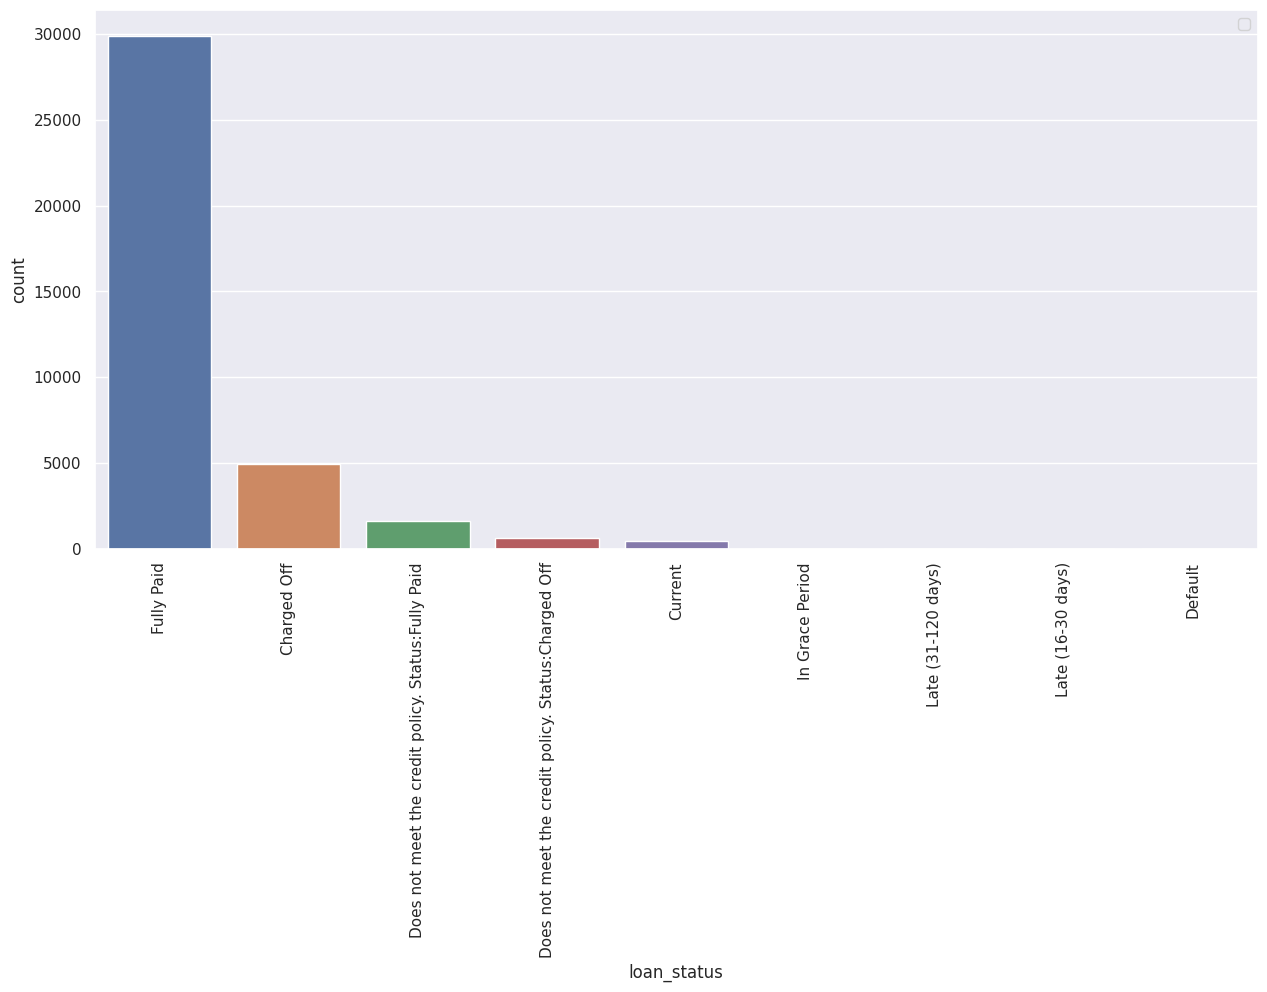

In [46]:
display(loan.groupby('loan_status').count().loan_amnt/len(loan.loan_status))
univariateAnalysis(df=loan,col='loan_status',vartype=1)

<font color='#0dab7f'><b>Intution</b>: <b>13%</b> of the applicants <b>Charged off</b>.</font>

#### 4.2.2. Purpose of loan

purpose
car                   0.042793
credit_card           0.144380
debt_consolidation    0.521596
educational           0.011190
home_improvement      0.082795
house                 0.011084
major_purchase        0.060840
medical               0.019749
moving                0.016559
small_business        0.051963
vacation              0.010632
wedding               0.026420
Name: loan_amnt, dtype: float64

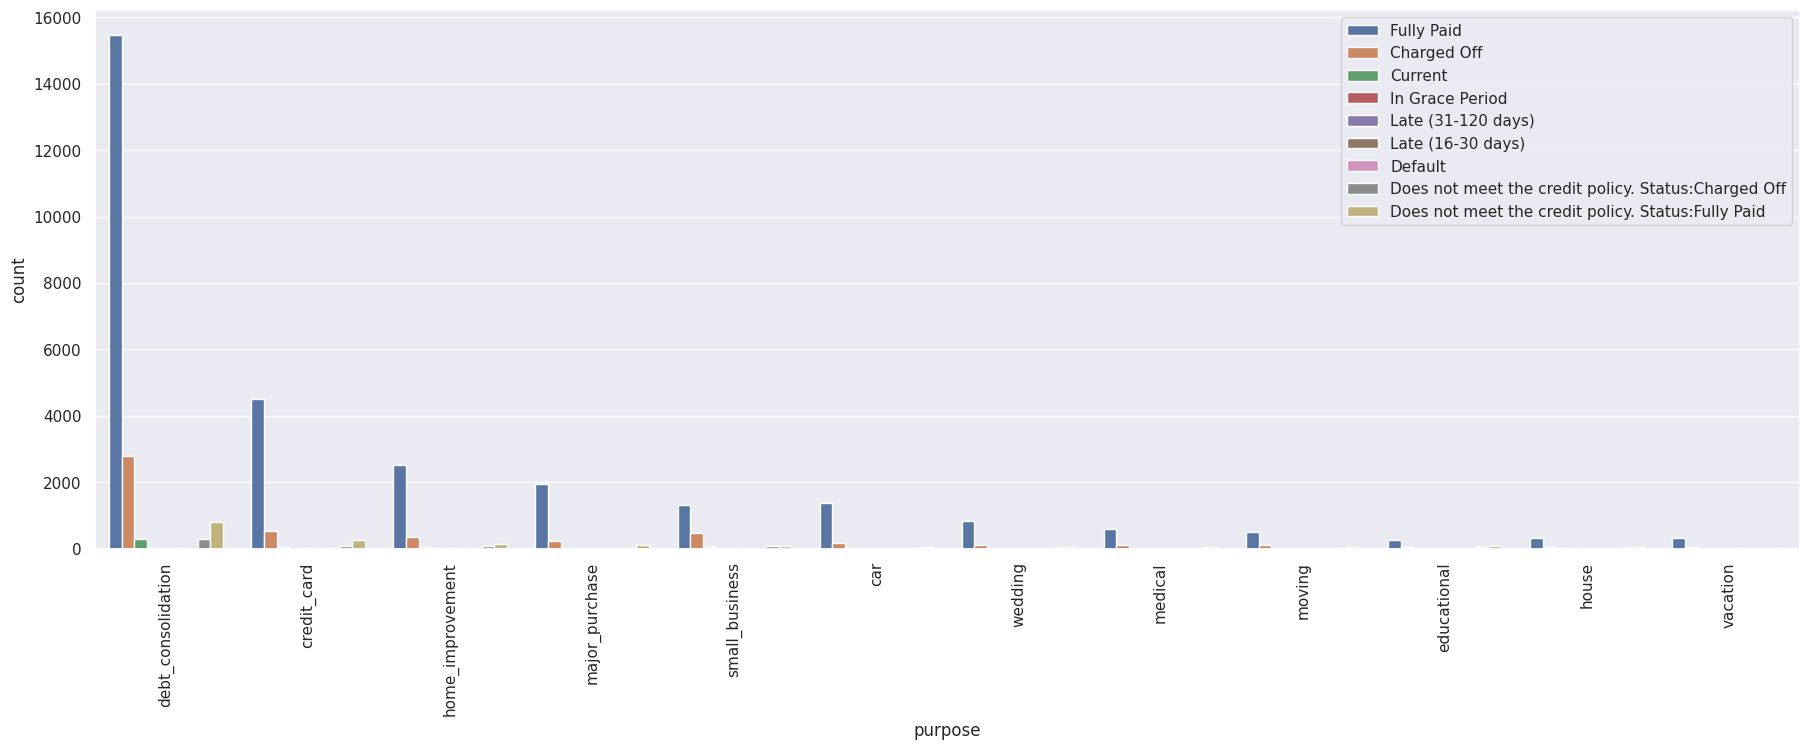

In [47]:
display(loan.groupby('purpose').count().loan_amnt/len(loan.purpose))
univariateAnalysis(df=loan,col='purpose',vartype=1,hue='loan_status')

<font color='#0dab7f'><b>Intution</b>:  Approx <b>52%</b> of the applicants applied loan for paying their other loans<b>(Debt Consolidation)

Small Business</b> Looks more <b>risky</b>.</font>

#### 4.2.3. Home Ownership wise Loan

In [48]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [49]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

home_ownership
MORTGAGE    0.452902
OWN         0.074786
RENT        0.472312
Name: loan_amnt, dtype: float64

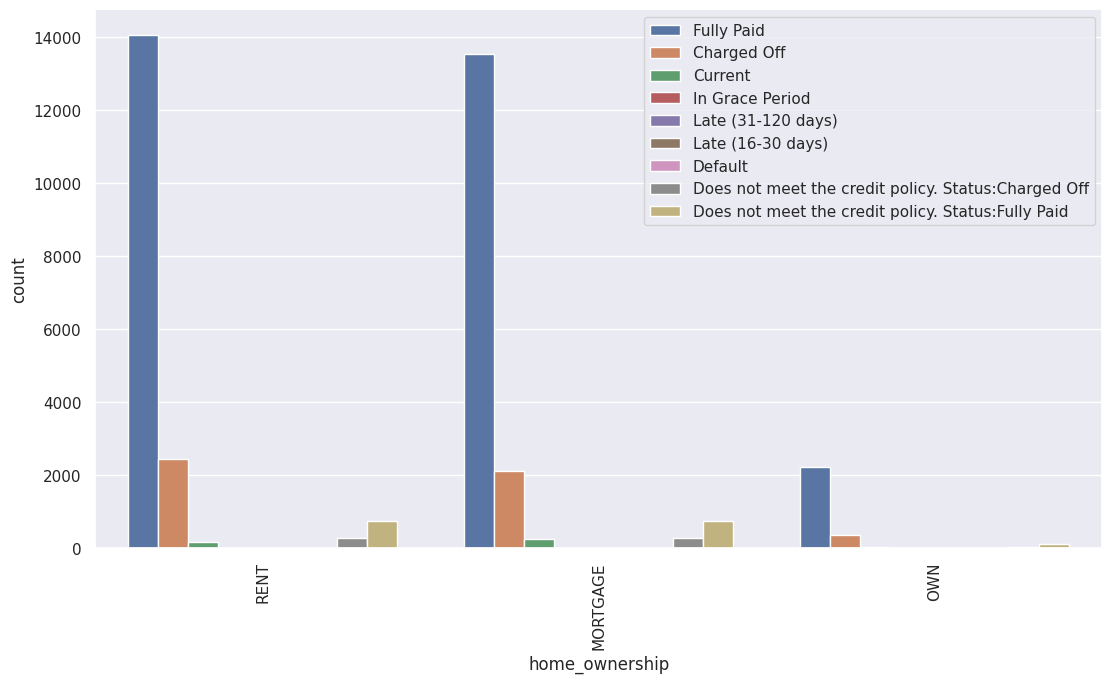

In [50]:
display(loan.groupby('home_ownership').count().loan_amnt/len(loan.home_ownership))
univariateAnalysis(df=loan,col='home_ownership',vartype=1,hue='loan_status')

<font color='#0dab7f'><b>Intution</b>: <b>47%</b> of applicants are living in <b>rented home</b> whereas <b>45% </b>applicants were <b>mortagaged</b> their home.</font>

#### 4.2.4. Year wise Loan

issue_year
07    0.012744
08    0.053457
09    0.119471
10    0.291599
11    0.522729
Name: loan_amnt, dtype: float64

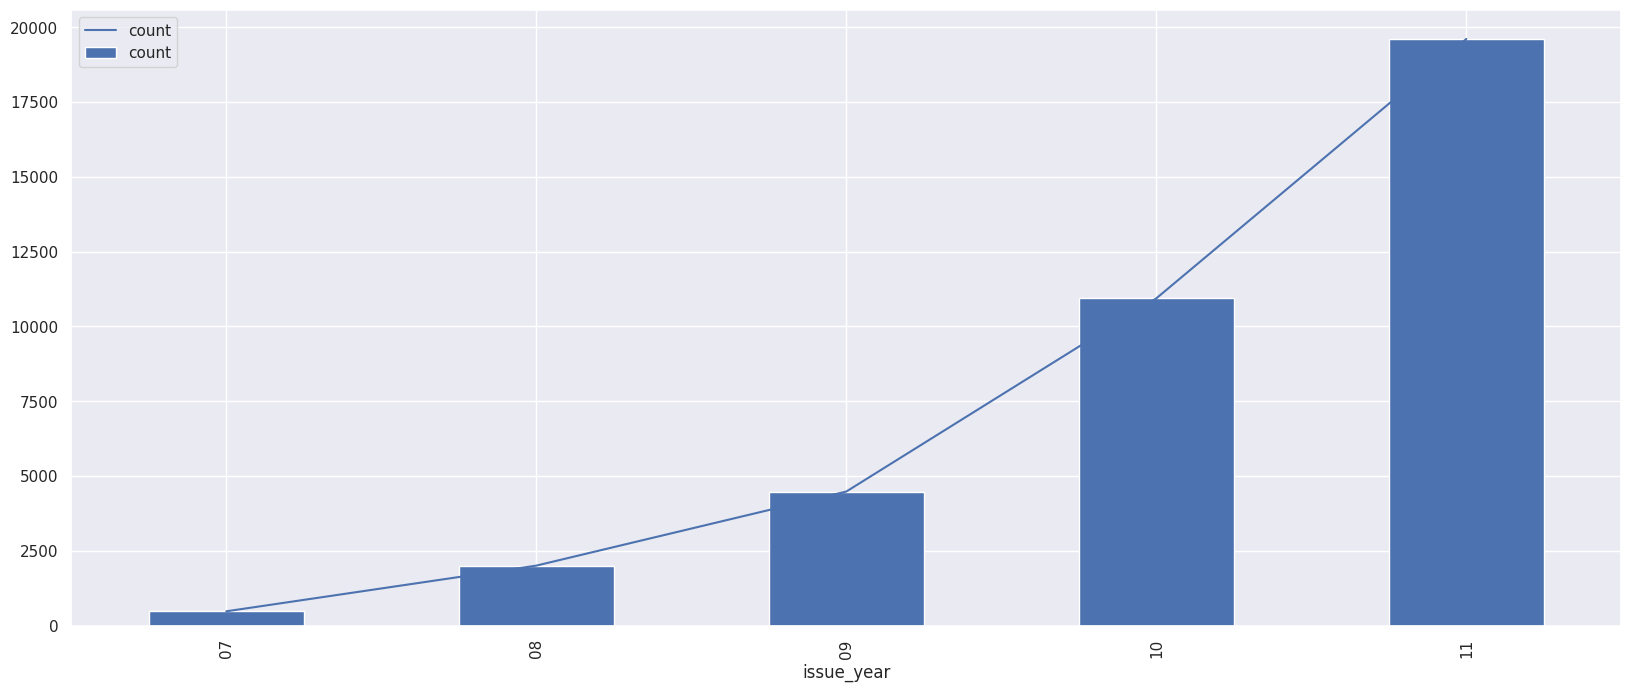

In [54]:
display(loan.groupby('issue_year').count().loan_amnt/len(loan.issue_year))

year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

<font color='#0dab7f'><b>Intution</b>: loan applicants are increasing year on year, approx <b>56%</b> of loan applicants received loans in <b>2011</b></font>

#### 4.2.5. Loan Term

term
 36 months    0.73429
 60 months    0.26571
Name: loan_amnt, dtype: float64

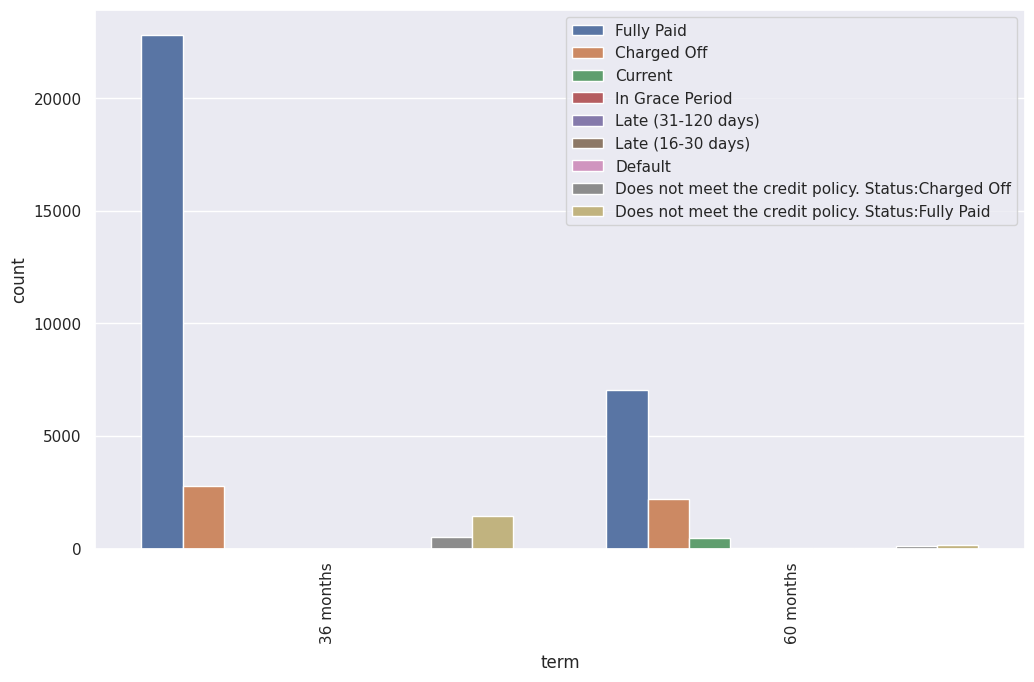

In [55]:
display(loan.groupby('term').count().loan_amnt/len(loan.term))
univariateAnalysis(df=loan,col='term',vartype=1,hue='loan_status')

<font color='#0dab7f'><b>Intution</b>: <b>73%</b> of applicants applied loan for <b>36 months</b> term period.</font>

In [56]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,0,0,0,0.208333,Dec,11,0-5000,0-25000,10-12.5
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,0,0,0,0.083333,Dec,11,0-5000,25000-50000,15 and above
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,0,0,0,0.195886,Dec,11,0-5000,0-25000,15 and above
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,0,0,0,0.138889,Dec,11,0-5000,25000-50000,7.5-10
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0,0,0,0,0.148923,Dec,11,5000-10000,25000-50000,15 and above


## Step 5. Bivariate/Multivariate Analysis

#### 5.1. Purpose of Loan vs Loan Amount for each Loan Status

In [60]:
loancopy = loan.copy()
loancopy = loancopy[(loancopy.loan_status == 'Fully Paid' ) | (loancopy.loan_status == 'Charged Off')]

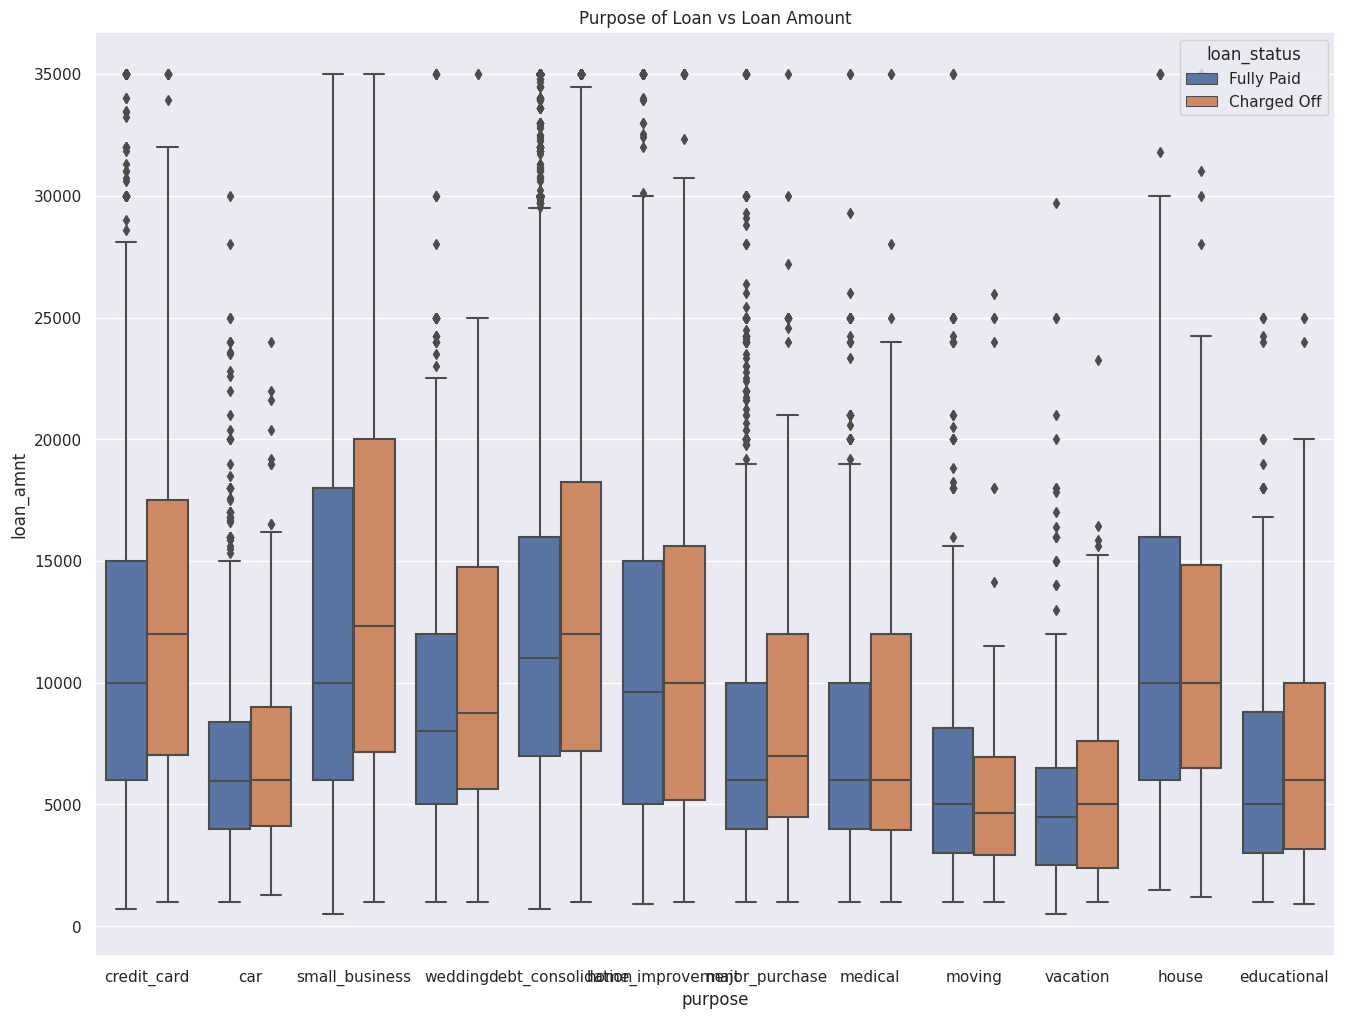

In [58]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loancopy, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

#### 5.2. Correlation Matrix : All Continuos(Numeric) Variables

In [61]:
loan_correlation = loan.corr()
loan_correlation

<ipython-input-61-539ea4835cd2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation = loan.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.000000,0.981233,0.929379,0.300960,0.927495,0.419291,0.077909,0.615411
funded_amnt,0.981233,1.000000,0.947455,0.304454,0.954165,0.414669,0.077417,0.603069
funded_amnt_inv,0.929379,0.947455,1.000000,0.288306,0.887782,0.390051,0.081901,0.567826
int_rate,0.300960,0.304454,0.288306,1.000000,0.278968,0.077754,0.122511,0.207695
installment,0.927495,0.954165,0.887782,0.278968,1.000000,0.419499,0.067090,0.551155
annual_inc,0.419291,0.414669,0.390051,0.077754,0.419499,1.000000,-0.106026,-0.318052
dti,0.077909,0.077417,0.081901,0.122511,0.067090,-0.106026,1.000000,0.140449
loan_income_ratio,0.615411,0.603069,0.567826,0.207695,0.551155,-0.318052,0.140449,1.000000


#### 5.3. HeatMap: All continuos variables

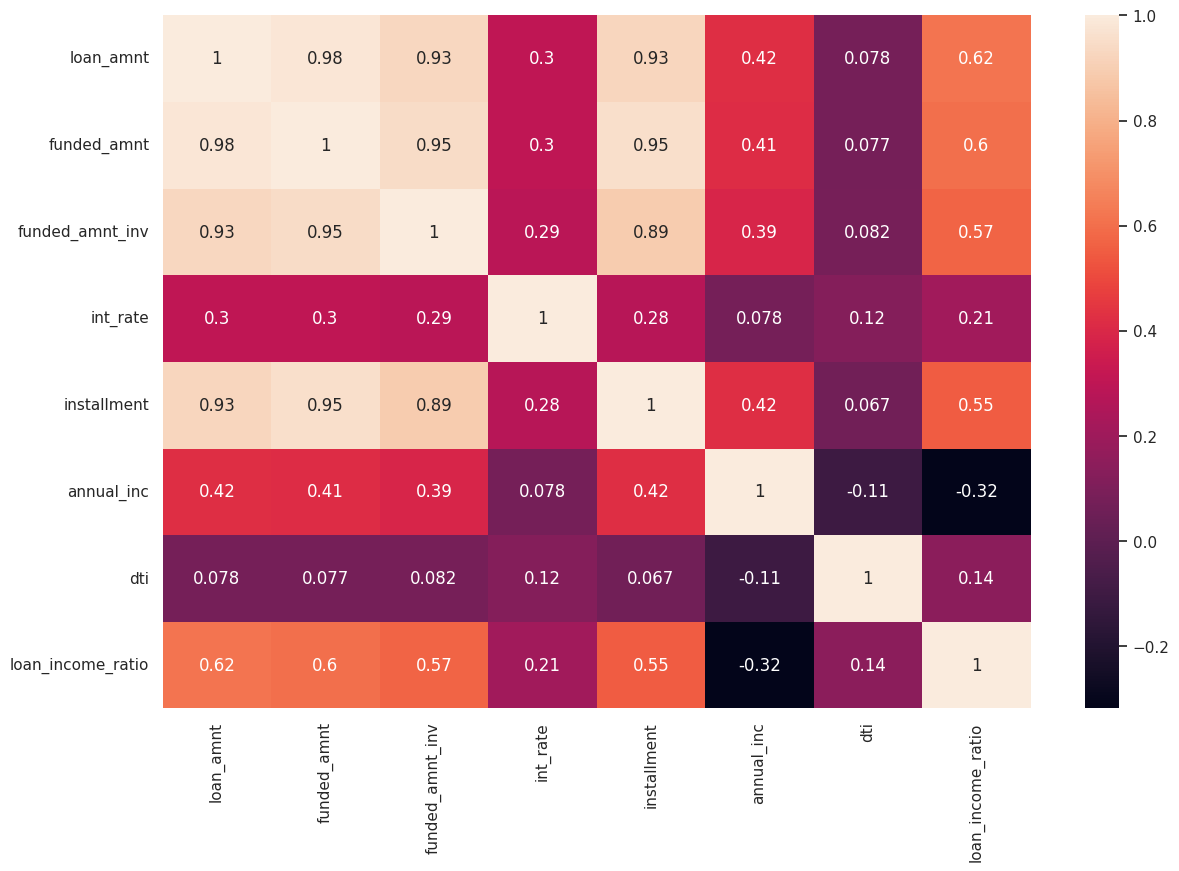

In [62]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation,
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color='#0dab7f'><b>Intution</b>: <b>'loan_amnt','funded_amnt' and 'funded_amnt_inv'</b> are <b>closely interrelated</b>. Analyse only loan_amnt and ignore 'funded_amnt' and 'funded_amnt_inv'</font>

#### 5.4. Employment Length vs Loan Amount for each Loan Purpose

In [64]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']
loanstatus.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,0,0,0,0.083333,Dec,11,0-5000,25000-50000,15 and above
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0,0,0,0,0.140000,Dec,11,5000-10000,25000-50000,NaN
12,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,0,0,0,0,0.300000,Dec,11,5000-10000,25000-50000,12.5-15
21,21000.0,21000.0,21000.0,36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,...,0,0,0,0,0.200000,Dec,11,20000-25000,100000 and above,10-12.5
24,6000.0,6000.0,6000.0,36 months,11.71,198.46,B,B3,bmg-educational,1 year,...,0,0,0,0,0.078947,Dec,11,5000-10000,75000-100000,10-12.5


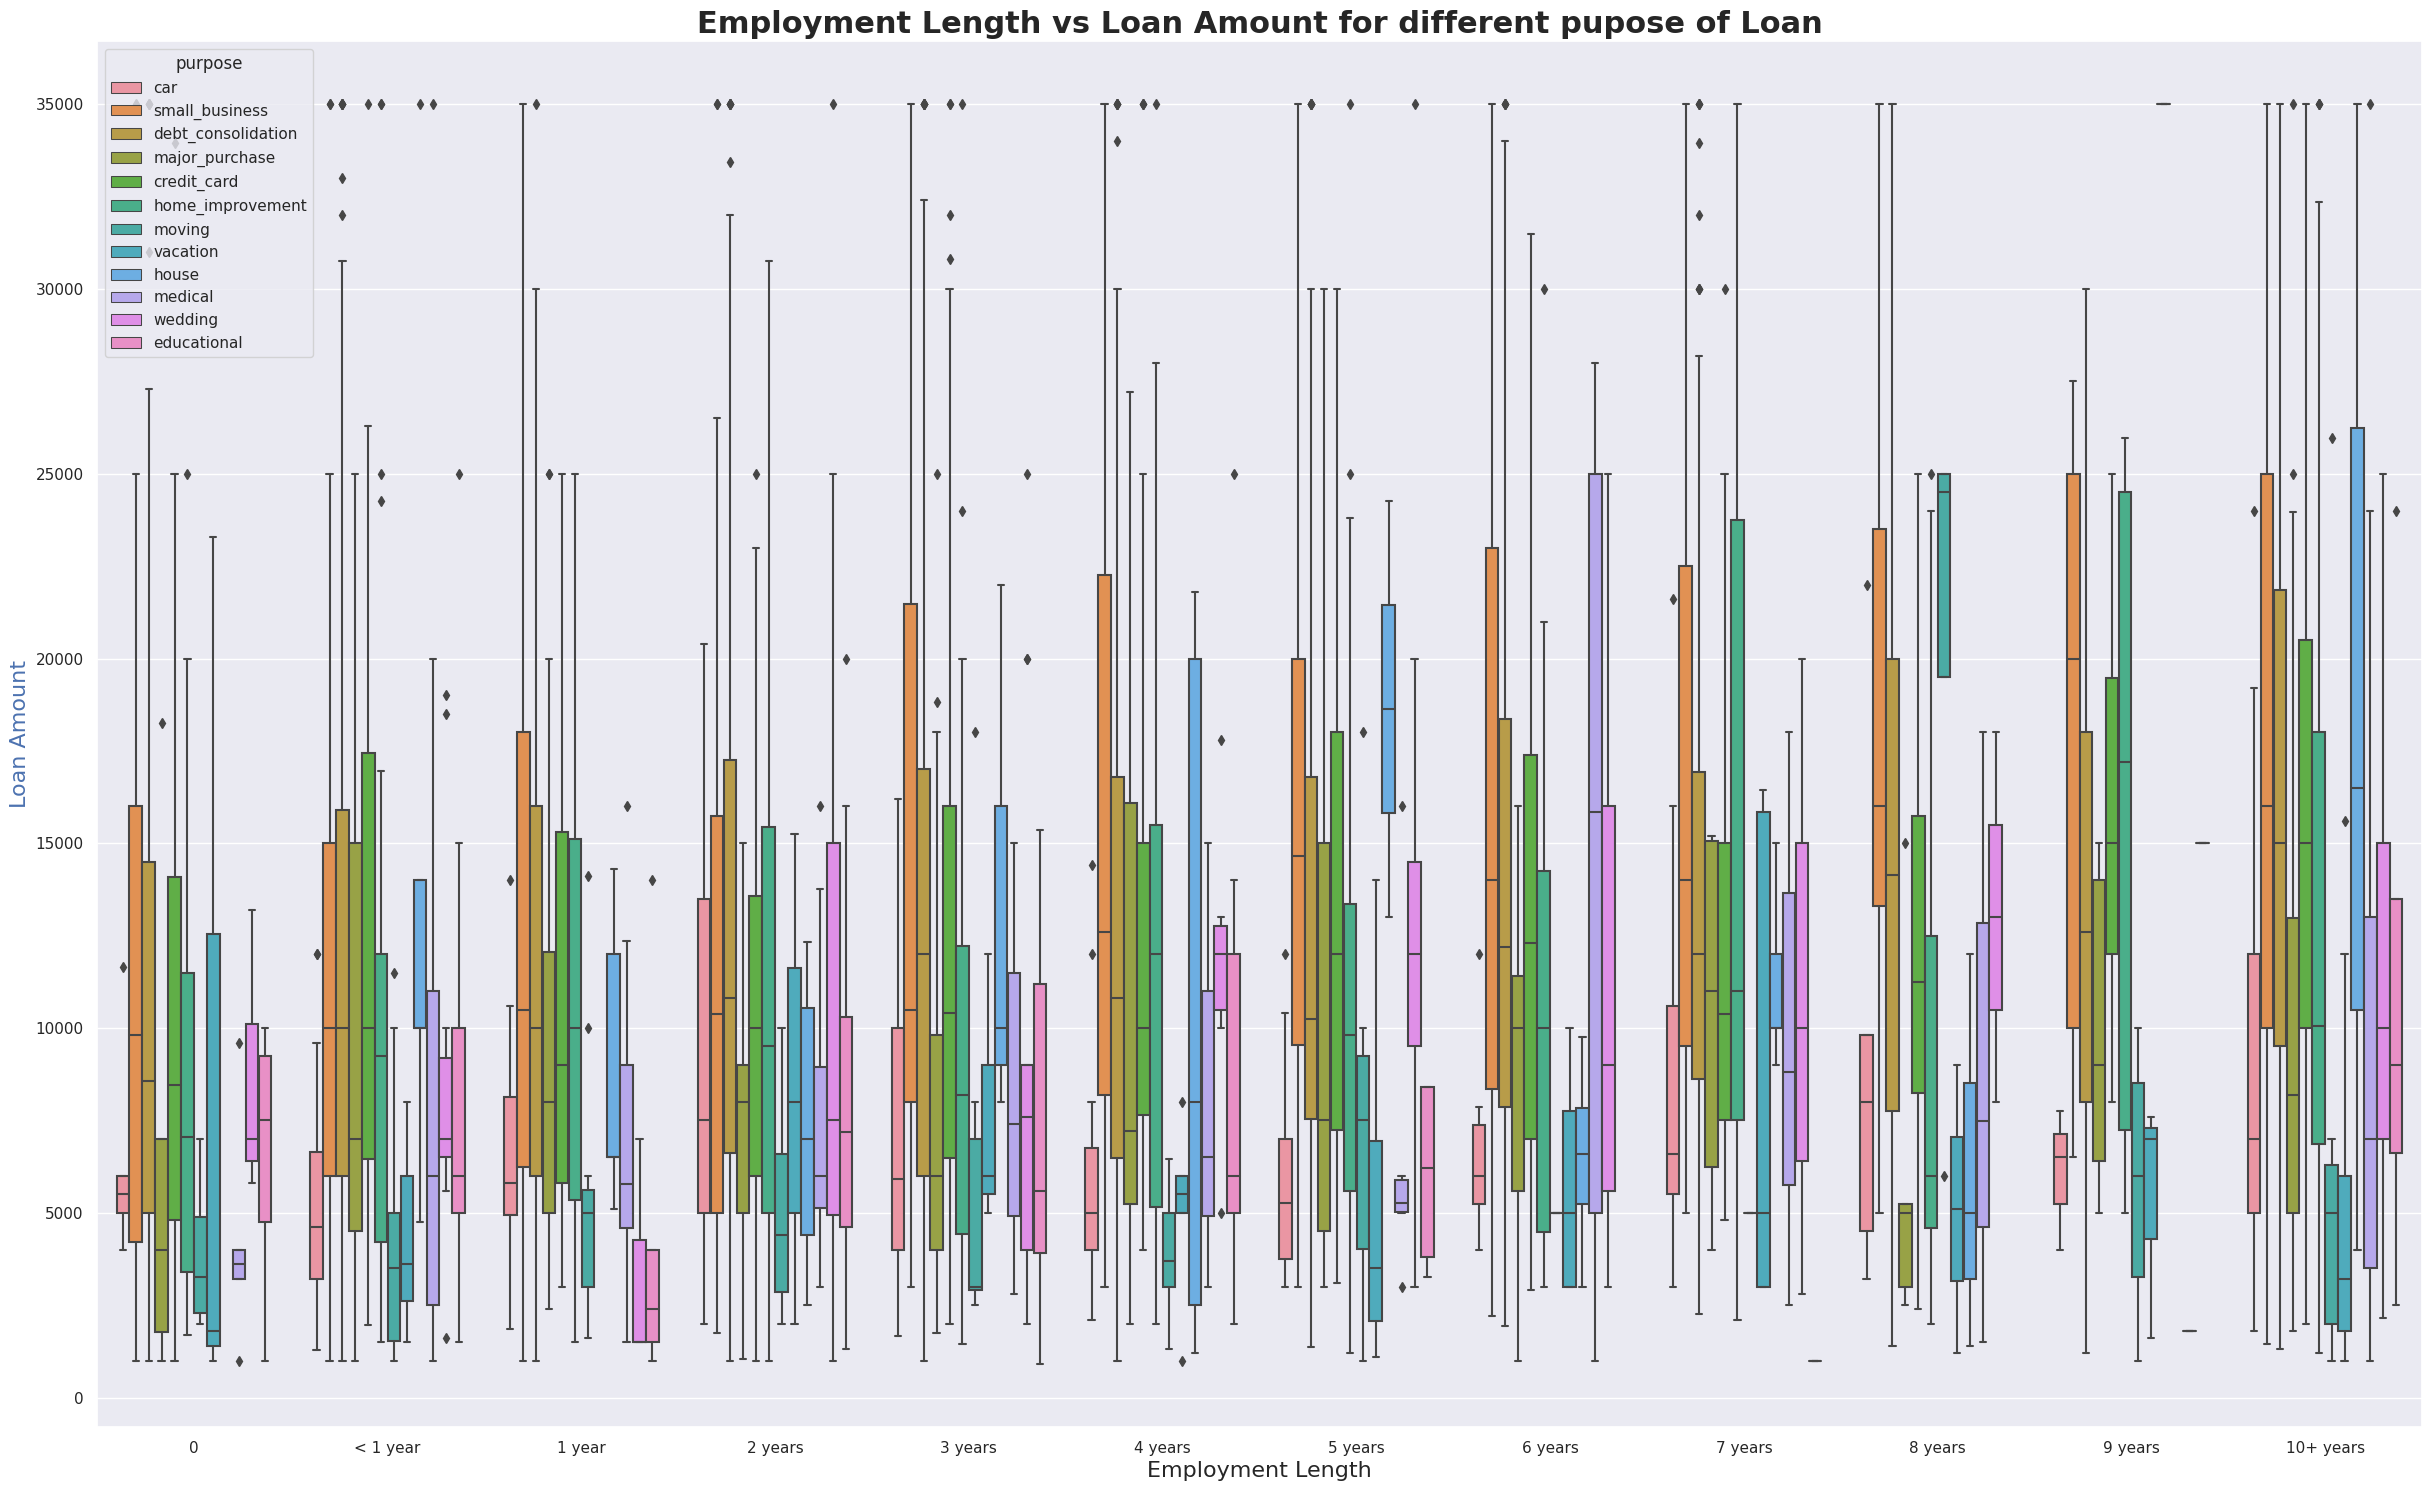

In [65]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

<a id='bivariate_prob'></a>

## Step 6: Bivariate/Multivariate Analysis for Probability of Charge off
We will calculate probability of Charged Off with respect to Fully Paid.
We will ignore all current ongoing loans as outcome of current loan is not known

In [66]:
#UDF Name            : crosstab
#Input parameters    : a. dataframe - Dataframe to operate on
#                      b. col - Column for which cross tab to be taken
#Output parameter    : crosstab - dataframe after taking cross tab
# Description        : It will return crosstab for given dataframe and column

def crosstab(dataframe,col):
    crosstab = pd.crosstab(dataframe[col], dataframe['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/(crosstab['Charged Off'] + crosstab['Fully Paid'])),2)
    return crosstab

In [67]:
#UDF Name            : bivariateProbability
#Input parameters    : a. dataframe - Dataframe to operate on
#                      b. col - Column for which probability needs to be found for charged off
#Output parameter    : Plot and probability for charge off
# Description        : It will return percentage for chargeoff for each column and plot it.

# Probability of charge off
def bivariateProbability(dataframe, col, stacked= True):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(dataframe,col)

    # We don't need to plot for All/summary after taking cross tab
    plotCrosstab.drop(['All'],inplace = True,  axis=0)
    linePlot = plotCrosstab[['Probability_Charged Off']]

    # Drop Current loans as outcome is not known
    #plotCrosstabx = plotCrosstab.drop(['Current'],  axis=1)
    plotCrosstabx = plotCrosstab[['Charged Off', 'Fully Paid']]

    barPlot =  plotCrosstabx.iloc[:,0:2]


    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(dataframe[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")

    ax.set_xlabel(dataframe[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)

    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)

    plt.show()

#### 6.1. Location vs Probability Charge Off

In [75]:
# Drop states less than 15
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 15)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
addr_state,,,,,,,,,,,
AK,14,1,1,1,3,57,0,0,0,77,0.20
AL,49,9,0,6,17,354,0,0,0,435,0.12
AR,23,3,0,3,6,198,0,0,0,233,0.10
AZ,108,12,0,15,26,652,0,1,0,814,0.14
CA,997,63,0,83,186,5253,1,0,3,6586,0.16
CO,84,13,0,8,45,620,1,0,0,771,0.12
CT,87,11,0,8,37,568,1,0,0,712,0.13
DC,13,1,0,1,5,182,0,0,0,202,0.07
DE,8,0,0,4,15,92,0,0,0,119,0.08


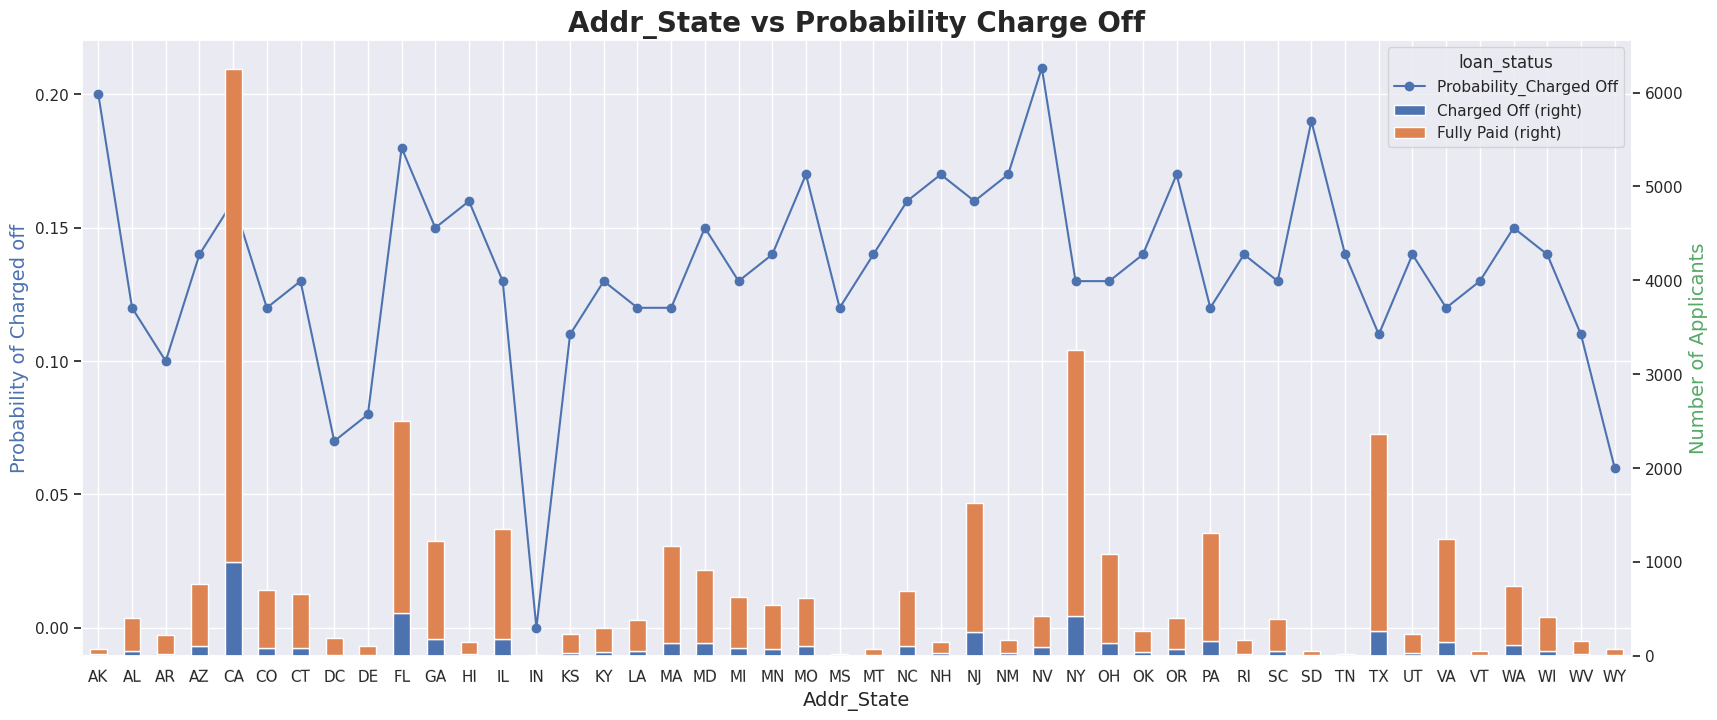

In [69]:
states = crosstab(loan_filter_states,'addr_state')
display(states)

bivariateProbability(loan_filter_states,'addr_state')

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is in <b>NV State.</b></font>

#### 6.2. Purpose of Loan vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
purpose,,,,,,,,,,,
car,159,15,0,13,49,1371,0,0,0,1607,0.10
credit_card,539,58,1,66,263,4487,0,0,2,5416,0.11
debt_consolidation,2765,282,0,284,787,15433,13,2,6,19572,0.15
educational,56,0,0,31,64,265,0,0,0,416,0.17
home_improvement,341,32,0,69,136,2526,1,1,2,3108,0.12
house,58,9,0,10,32,304,1,0,0,414,0.16
major_purchase,220,4,0,23,97,1937,0,0,0,2281,0.10
medical,106,5,0,20,33,574,0,0,0,738,0.16
moving,90,1,0,15,29,485,0,0,0,620,0.16


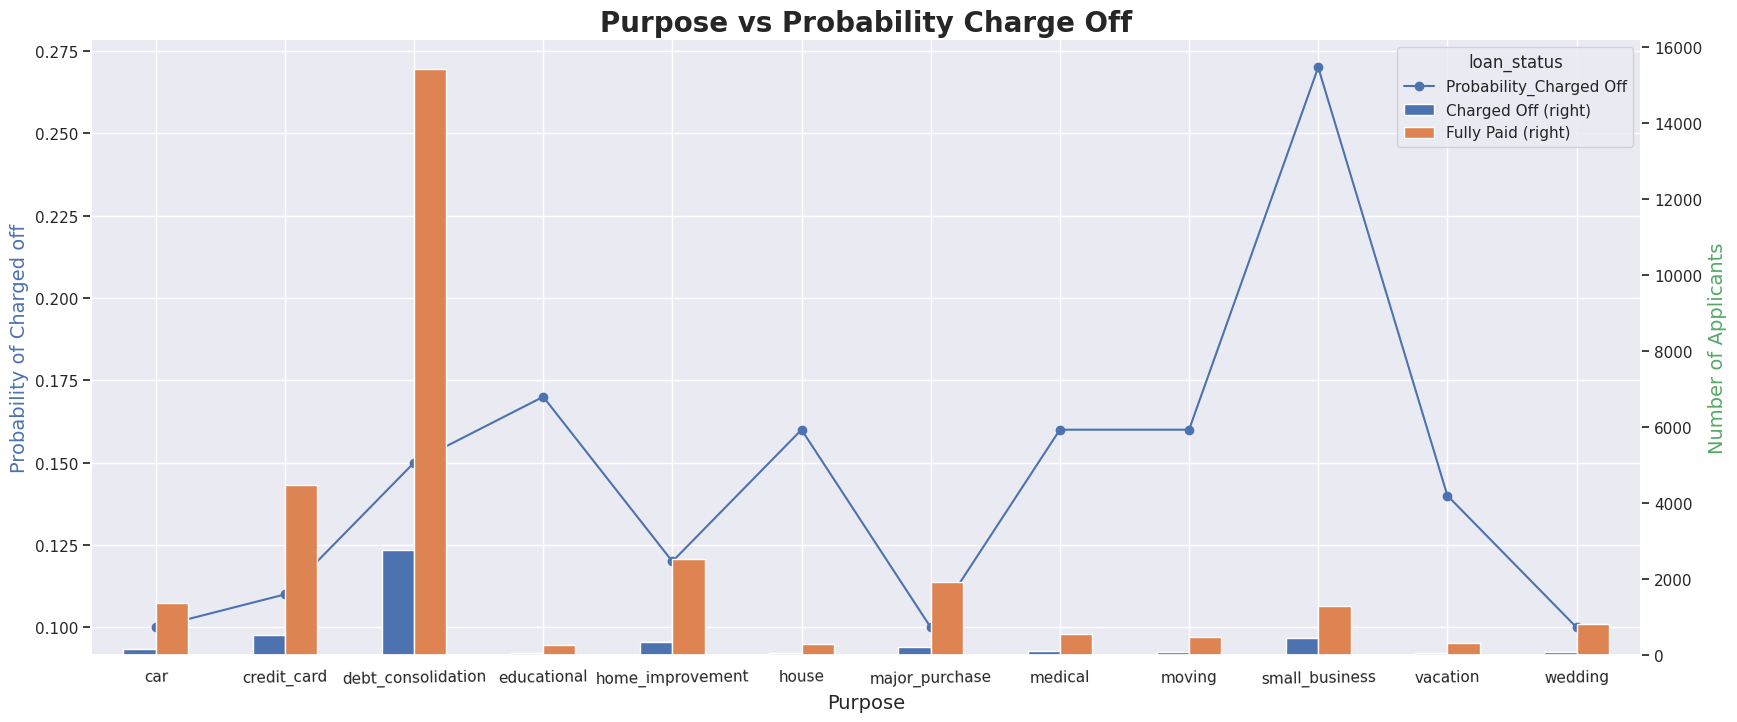

In [77]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariateProbability(loan,'purpose',False)

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is for purpose: <b>Small Business - To be considered in Charge Off prediction</b></font>

#### 6.3. Grade/Subgrade vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
grade,,,,,,,,,,,
A,511,16,0,7,59,8361,0,1,0,8955,0.06
B,1246,127,0,67,203,9292,1,2,3,10941,0.12
C,1172,114,0,121,387,5869,2,0,2,7667,0.17
D,993,94,0,154,420,3653,2,1,1,5318,0.21
E,646,61,1,129,321,1853,8,0,3,3022,0.26
F,293,30,0,80,134,619,1,0,2,1159,0.32
G,89,6,0,57,103,189,1,0,0,445,0.32
All,4950,448,1,615,1627,29836,15,4,11,37507,0.14


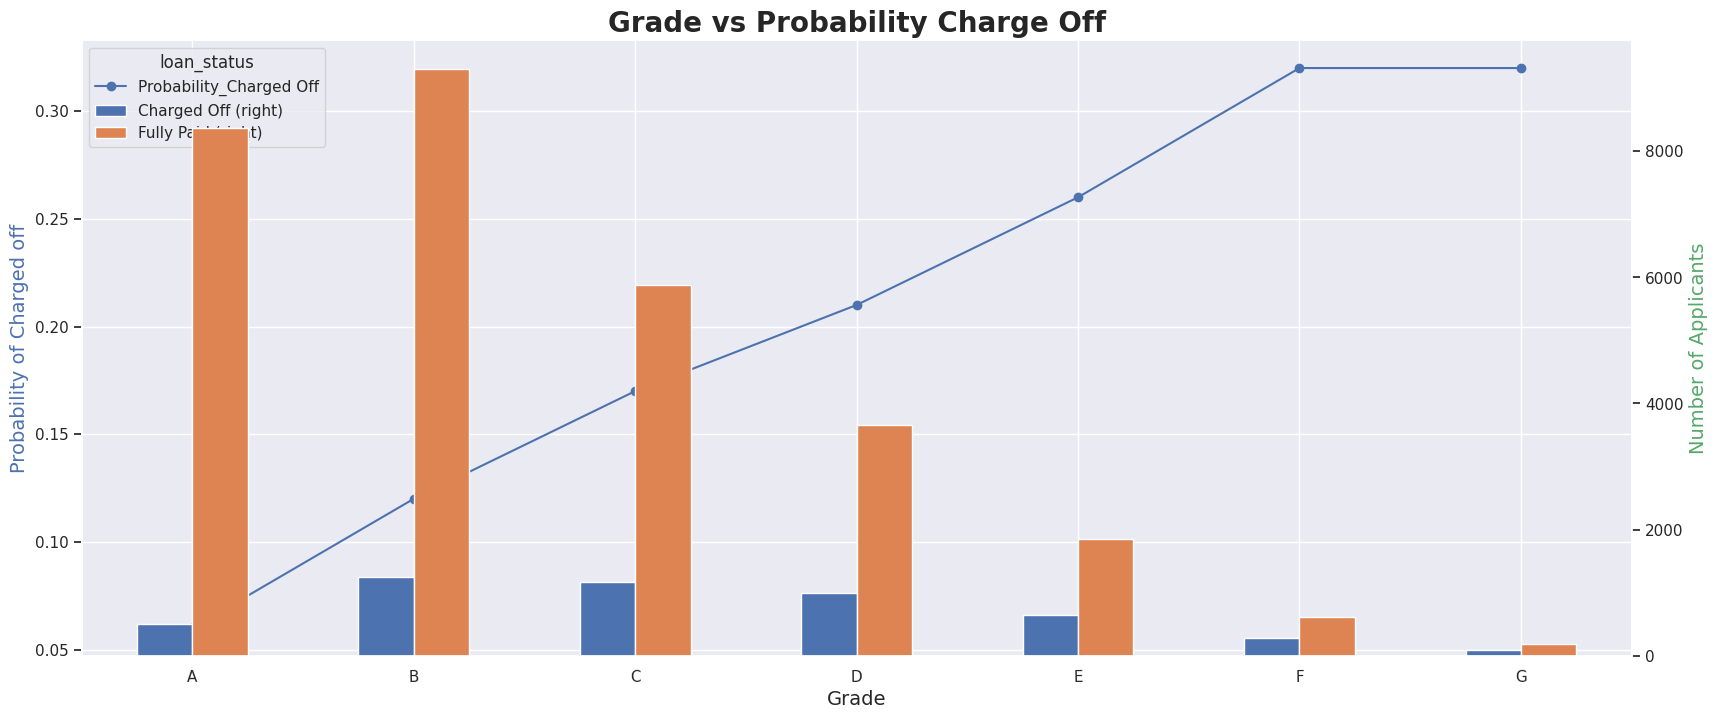

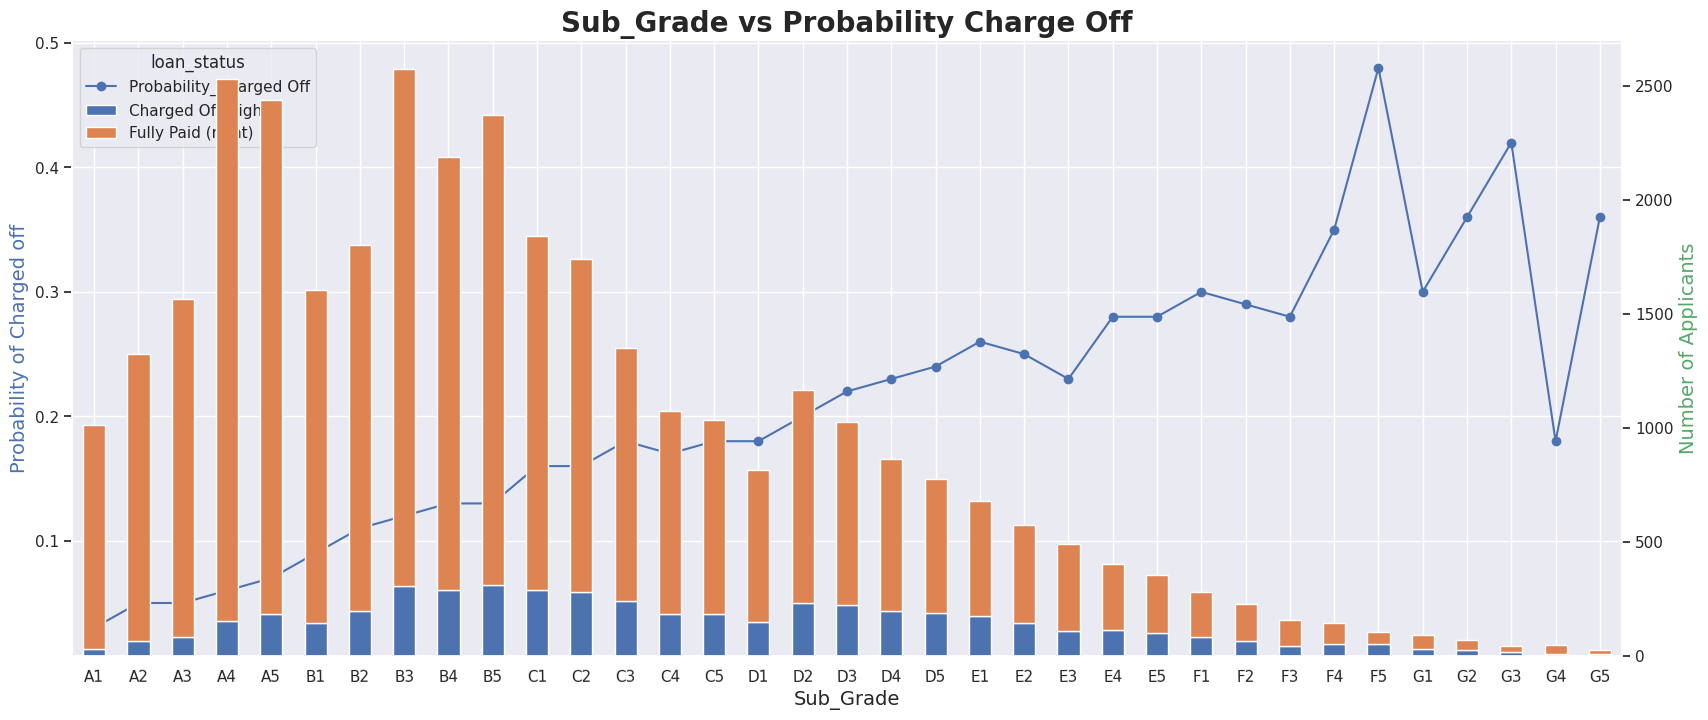

In [78]:
grade = crosstab(loan,'grade')
display(grade)

bivariateProbability(loan, 'grade', False)
bivariateProbability(loan, 'sub_grade')

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is for Grade: <b>G - To be considered in Charge Off prediction</b>, With reduction in Grade, probability of charge-off increases</font>

#### 6.4. Annual Income Range vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
annual_inc_range,,,,,,,,,,,
0-25000,386,6,0,62,169,1719,0,0,0,2342,0.18
25000-50000,1873,131,0,217,522,9688,5,2,2,12440,0.16
50000-75000,1527,142,1,175,424,9221,7,1,2,11500,0.14
75000-100000,674,89,0,85,277,4926,1,0,3,6055,0.12
100000 and above,490,80,0,76,235,4282,2,1,4,5170,0.10
All,4950,448,1,615,1627,29836,15,4,11,37507,0.14


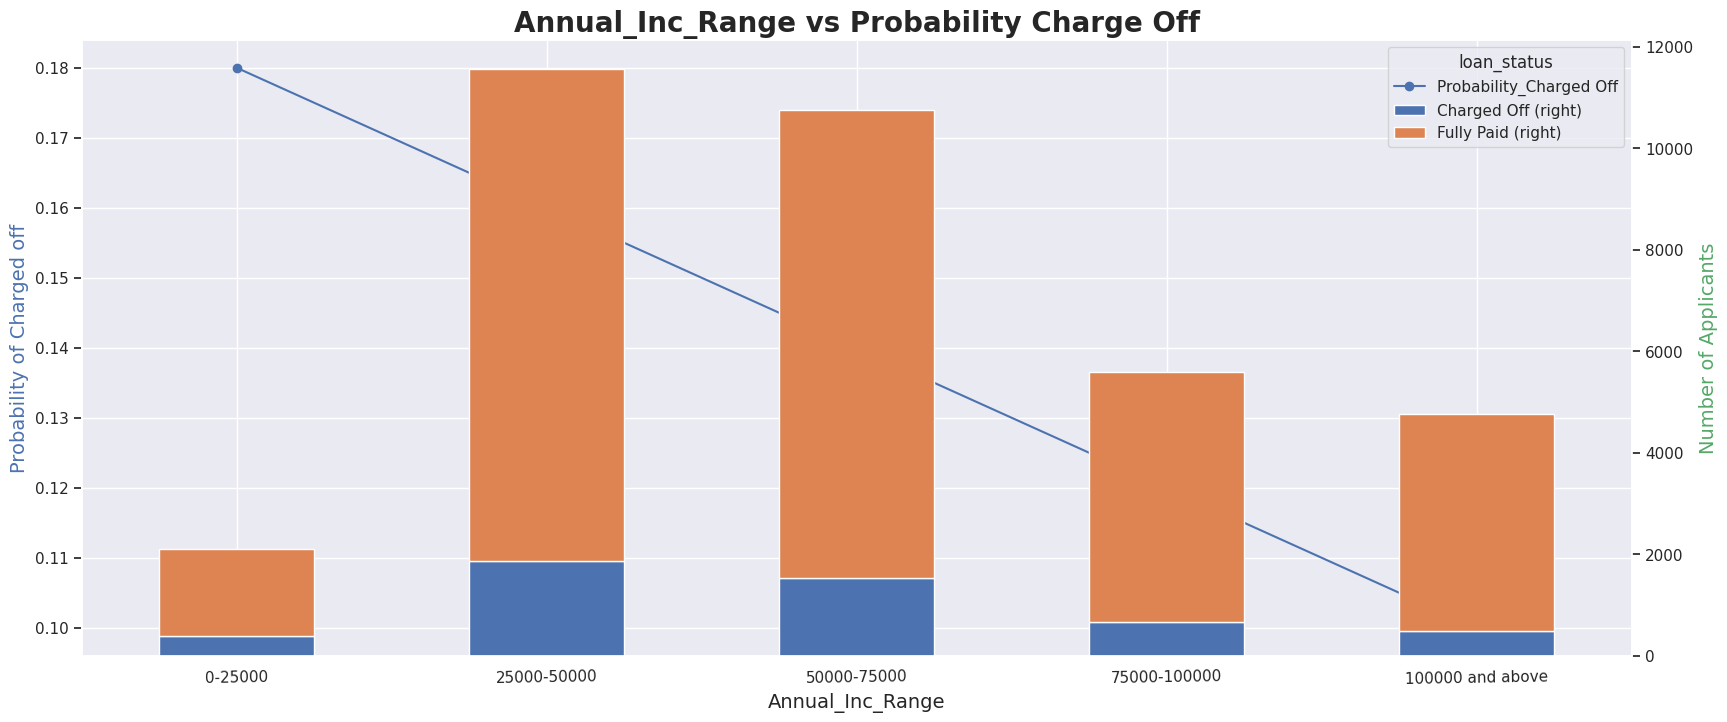

In [79]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariateProbability(loan,'annual_inc_range')

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is for <b>Lower Income Group - To be considered in Charge Off prediction</b>. With increase in Annual Income, probability of charge off reduces</font>

#### 6.5. Interest rate Range vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
int_rate_range,,,,,,,,,,,
0-7.5,224,0,0,2,12,4572,0,0,0,4810,0.05
7.5-10,478,30,0,25,101,5660,0,2,0,6296,0.08
10-12.5,1089,87,0,100,268,7362,0,1,3,8910,0.13
12.5-15,1291,117,0,219,664,6662,3,0,0,8956,0.16
15 and above,1599,169,1,252,551,5114,10,1,6,7703,0.24
All,4681,403,1,598,1596,29370,13,4,9,36675,0.14


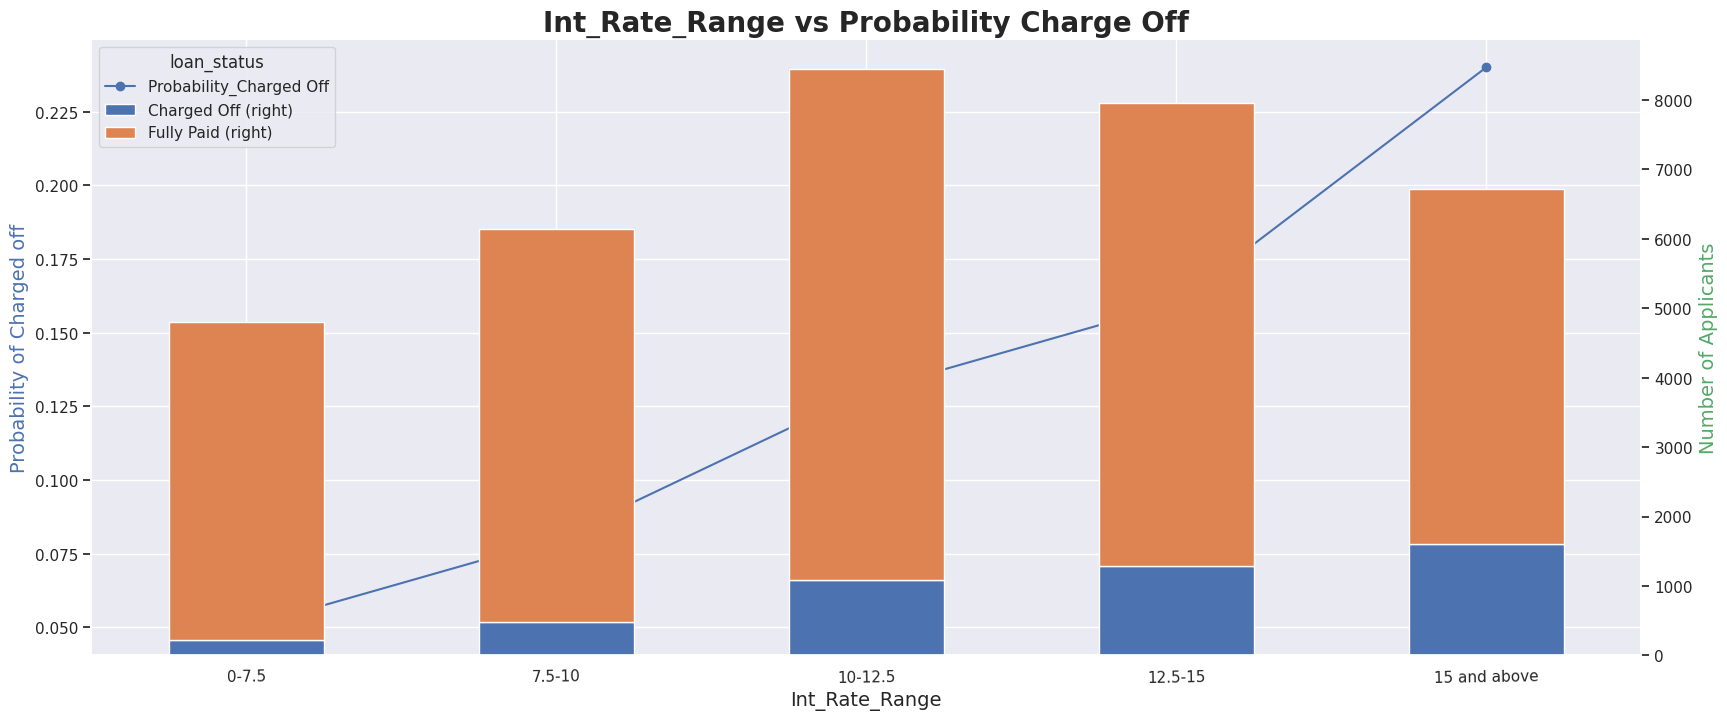

In [80]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariateProbability(loan,'int_rate_range')

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is for <b> High interest rate (at 15% and above probability is 24%)To be considered in Charge Off prediction</b>. With increase in interest rate, probability of charge off increases</font>

#### 6.6. Employment Length vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
emp_length,,,,,,,,,,,
0,191,16,0,14,15,696,0,1,0,933,0.22
< 1 year,561,24,0,89,292,3429,3,0,0,4398,0.14
1 year,396,26,1,73,215,2414,0,0,1,3126,0.14
2 years,484,37,0,71,210,3362,0,1,2,4167,0.13
3 years,485,35,0,57,166,3134,1,1,0,3879,0.13
4 years,405,40,0,50,121,2633,3,1,1,3254,0.13
5 years,413,29,0,42,106,2502,0,0,0,3092,0.14
6 years,277,25,0,33,80,1710,1,0,0,2126,0.14
7 years,232,26,0,25,55,1322,1,0,0,1661,0.15


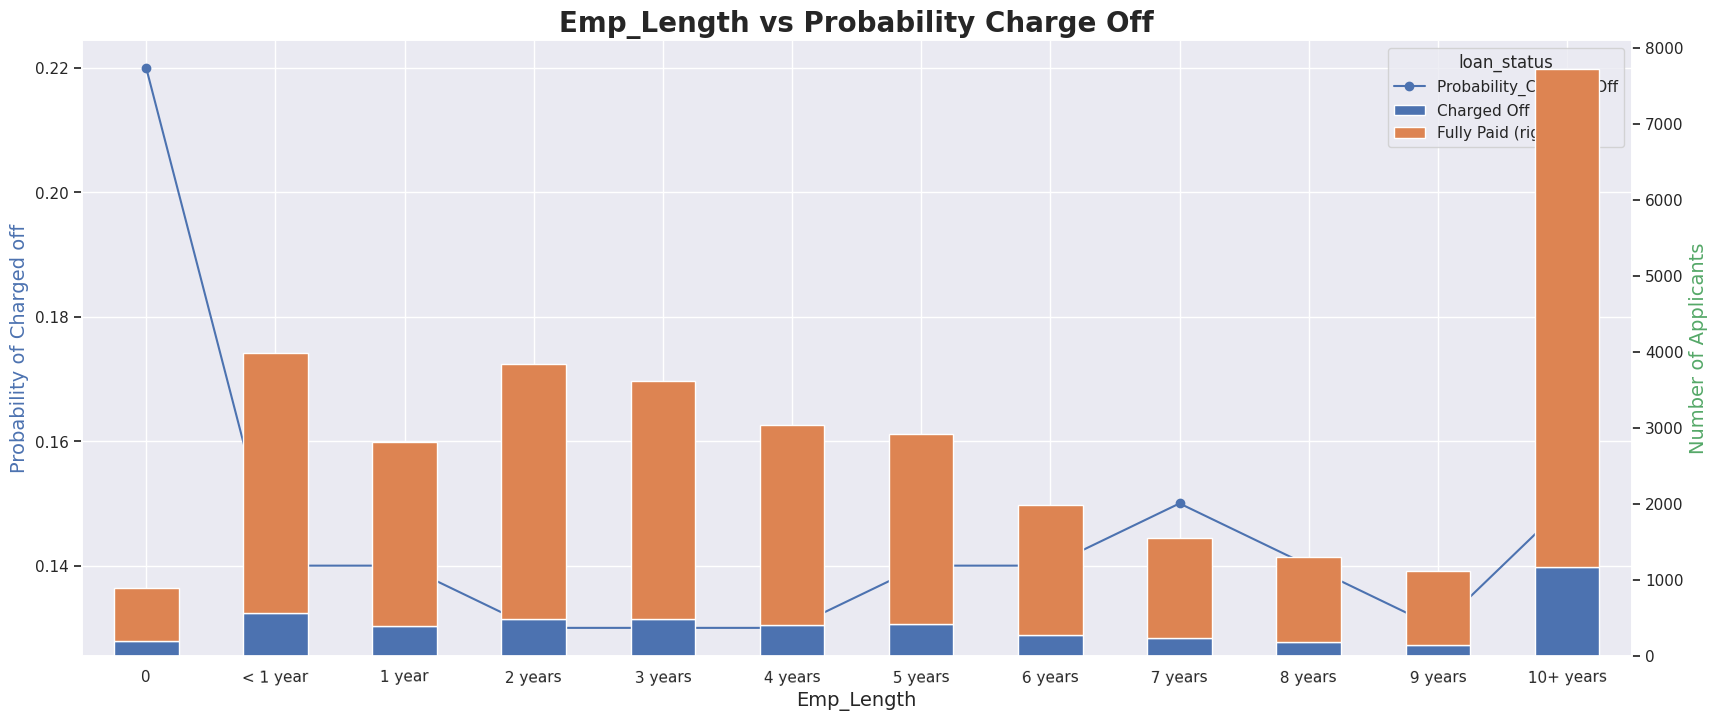

In [81]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariateProbability(loan,'emp_length')

<font color='#0dab7f'><b>Intution</b>: Highest Probability of Charged Off is for : <b>Self Employed - To be considered in Charge Off prediction</b></font>